## Installs and Imports

In [4]:
#!pip install open3d

In [70]:
import numpy as np
import open3d as o3d
import sklearn as sk
from sklearn import cluster, datasets, mixture
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import random

## Helper Functions

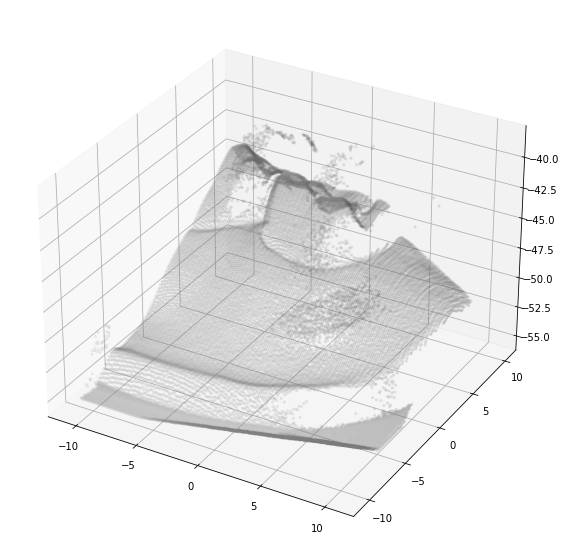

In [85]:
# Inputs:
#    cloud: either open3d cloud or numpy array
#    color: array for colors, leave None for default colors
#    mirrorX/mirrorY/mirrorZ: boolean, to mirror the plot alongside the respective axis

def plotCloud(cloud, color = None, mirrorX = False, mirrorY = False, mirrorZ = False):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    
    points = []
    if(type(cloud) == "numpy.ndarray"): # if cloud is array
        points = cloud
    else: #if cloud is open3d cloud
        points = np.asarray(pcd.points)
        if color == None:
            color = cloud.colors
        
    ax.scatter(points[:,0]*-(mirrorX*2-1),points[:,1]*-(mirrorY*2-1),points[:,2]*-(mirrorZ*2-1), c = color, marker = ".", alpha = 0.1)
    plt.show()

#plotCloud(pcd, mirrorY = True, mirrorZ = True)

## Load Files

Load a ply point cloud, print it, and render it
PointCloud with 24775 points.
[[-8.684366 -8.684366 44.307988]
 [-8.567612 -8.676063 44.265625]
 [-8.461217 -8.678172 44.276386]
 ...
 [ 9.860027 10.116131 52.266242]
 [10.000024 10.128229 52.328747]
 [10.131802 10.131802 52.347209]]


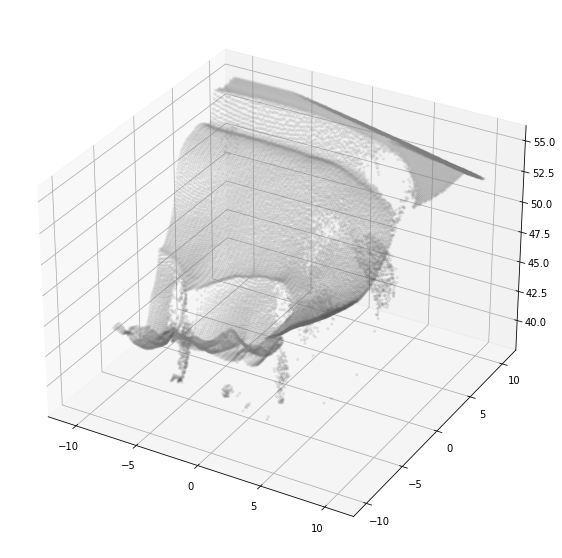

In [75]:
print("Load a ply point cloud, print it, and render it")
pcd = o3d.io.read_point_cloud("../data/plyfolder/points0.ply")
print(pcd)
print(np.asarray(pcd.points))
#o3d.visualization.draw_geometries([pcd])
plotCloud(pcd)

In [72]:
type(np.asarray(pcd.points))

numpy.ndarray

array([-8.684366, -8.567612, -8.461217, ...,  9.860027, 10.000024,
       10.131802])

## Outlier Removal

In [22]:
downpcd = pcd.voxel_down_sample(voxel_size=0.1)

In [23]:
o3d.visualization.draw_geometries([downpcd])

## Mesh Convertion

In [3]:
alpha = 0.7

mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(downpcd, alpha)
mesh.compute_vertex_normals()
print(mesh)

NameError: name 'downpcd' is not defined

In [1]:
o3d.visualization.draw_geometries([mesh], mesh_show_back_face=True)

NameError: name 'o3d' is not defined

## Clustering

In [18]:
sk.cluster.K(np.asarray(pcd.points))

AttributeError: module 'sklearn' has no attribute 'cluster'